# Lab 4 Report
Taylor, Nicole, Steven

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
import pandas as pd
import matplotlib
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
from decimal import *

#timeshift function
def timeshift(x,fs,t0):
    numzeros = int(abs(t0)*fs)
    zeros = np.zeros(numzeros)
    if (t0<0):
        y = np.concatenate((zeros,x))
        t = np.arange(0,len(y),1)*(1/fs)
    elif (t0>0):
        newx = x[numzeros:]
        y = np.concatenate((newx,zeros))
        t = np.arange(0,len(y),1)*(1/fs)
    else:
        return x,np.arange(0,len(x),1)*(1/fs)
    
    return y,t
#timescale function
def timescale(x,fs,a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1/fs)
    return y,t
#unit step function
def u(t):
    return 1.0*(t>0)

def delta(t,fs):
    return fs * np.concatenate([[0],np.diff(u(t))])

## Summary
Include a brief abstract summarizing what this lab involves. (This should be a markup cell.)

## Assignment 1 --  Matched FIlter with Ideal Signals (Title of Assignment 1)

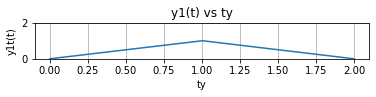

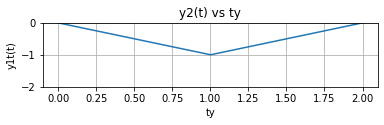

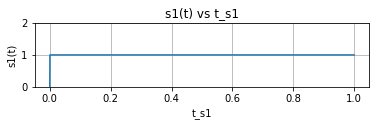

1.0
-1.0


In [10]:
# Assignment 1 - Time Scaling Function

# 1.
fs = 8000
t = np.arange(0,1+1/fs,1/fs)

s1 = u(t)-u(t-1)
t_s1 = np.arange(0,len(s1),1)/fs
s0 = -1*s1

# 2.
y1 = np.convolve(s1,s1)/fs
t_y = np.arange(0,len(y1),1)/fs
y2 = np.convolve(s1,s0)/fs

# 3.
fig = plt.figure(2)
fig.subplots_adjust(hspace = 1.5, wspace = 0.5)

plt.subplot(3,1,1)
plt.plot(t_y,y1)
plt.title("y1(t) vs ty")
plt.xlabel("ty")
plt.ylabel("y1t(t)")
plt.ylim(0,2)
plt.grid()
plt.show()

plt.subplot(3,1,2)
plt.plot(t_y,y2)
plt.title("y2(t) vs ty")
plt.xlabel("ty")
plt.ylabel("y1t(t)")
plt.ylim(-2,0)
plt.grid()
plt.show()

# 4.
plt.subplot(3,1,3)
plt.plot(t_s1,s1)
plt.title("s1(t) vs t_s1")
plt.xlabel("t_s1")
plt.ylabel("s1(t)")
plt.ylim(0,2)
plt.grid()
plt.show()


y1_corr = y1[int(1*fs)+1]
y2_corr = y2[int(1*fs)+1]
print(y1_corr)
print(y2_corr)
# Discussion


###  Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.


## Assignment 2 -- Signal Decoding with a Matched Filter (title of assignment 2)

In [11]:
# A.

def decode (r,fs,s0,s1):
    y = np.convolve(r,s0)
    y0_corr = [y(y.size/2)]/fs
    y1 = np.convolve(r,s1)
    y1_corr = [y1(y1.size/2)]/fs
    return y0_corr,y1_corr
   
    if (y1_corr > y0_corr):
        return 1
    else:
        return 0

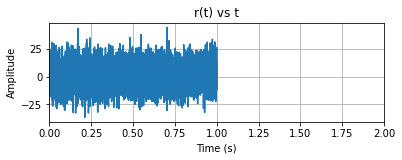

In [12]:
# B.a

fs = 8000
t = np.arange(0,1+1/fs,1/fs)

s1 = u(t)-u(t-1)
s0 = -1*s1

n = np.random.normal(0,10,len(s1))

# B.b
r = s1 + n
t_r = np.arange(0,len(s1),1)/fs


# B.c
plt.subplot(2,1,1)
plt.plot(t_r,r)
plt.title("r(t) vs t")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.grid()
plt.show()


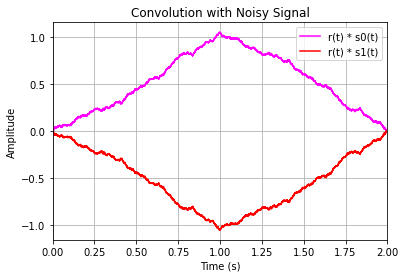

In [13]:
# C.a
yr1 = np.convolve(r,s1)/fs
yr0 = np.convolve(r,s0)/fs

t_yr = np.arange(0,len(yr1),1)/fs


# C.b
fig1 = plt.figure(1)
plt.plot(t_yr,yr1,label = "r(t) * s0(t)", color = "magenta")
plt.plot(t_yr,yr0,label = "r(t) * s1(t)", color = "red")
plt.title("Convolution with Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.legend()
plt.grid()
plt.show()


# C.c
#yr1_corr# C.a


###  Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.

## Assignment 3 -- Decipher Received Message (title of assignment 3)

In [2]:
# A.
def decode(r,fs,s0,s1):
    y0=np.convolve(r,s0)
    y0_corr=y0(y0.size/2)/fs
    y1=np.convolve(r,s1)
    y1_corr=y1(y1.size/2)/fs   
    if (y1_corr > y0_corr):
        return 1
    else:
        return 0

file = open("receivedmsg.csv", "rb")
rm = np.loadtxt(file, delimiter=",")

N = rm.shape[0]

# B. 
def rm_rows(N):
    message_bits = np.zeros(N)

# C.


# D.
print (message_bits)


###  Discussion